# Planar Maximally Filtered Graph (PMFG)

## Introduction

[Pozzi, Di Matteo, and Aste (2013)](https://www.nature.com/articles/srep01665) conclude that it is "better to invest in the peripheries" of the Planar Maximally Filtered Graph (PMFG), as investing in the peripheries lead to better returns, and reduced risk. This notebook explores the impacts of Covid-19 by simulating two investment portfolios - a portfolio consisting of peripheral stocks, versus a portfolio consisting of central stocks in the Planar Maximally Filtered Graph. This notebook also showcases how to construct PMFG visualisations, and how to create the dual interface to compare MST and Average Linkage MST (ALMST). 

A planar graph is a graph which can be drawn on a flat surface without the edges crossing. The Planar Maximally Filtered Graph (PMFG) is a planar graph where the edges connecting the most similar elements are added first ([Tumminello et al, 2005](https://arxiv.org/pdf/cond-mat/0501335.pdf)). For example, for a correlation-based PMFG, the edges with the highest correlation would be added first. The steps to construct the PMFG are defined as follows:

1. Order the edges from the highest similarity to the lowest.
2. Add the edge with the highest similarity to the PMFG, if the resulting graph is planar
3. Keep adding edges from the ordered list, until 3 (n - 2) edges have been added.

The PMFG retains the Minimum Spanning Tree (MST) as a subgraph, thus retains more information about the network than a MST ([Tumminello et al, 2005](https://arxiv.org/pdf/cond-mat/0501335.pdf)).

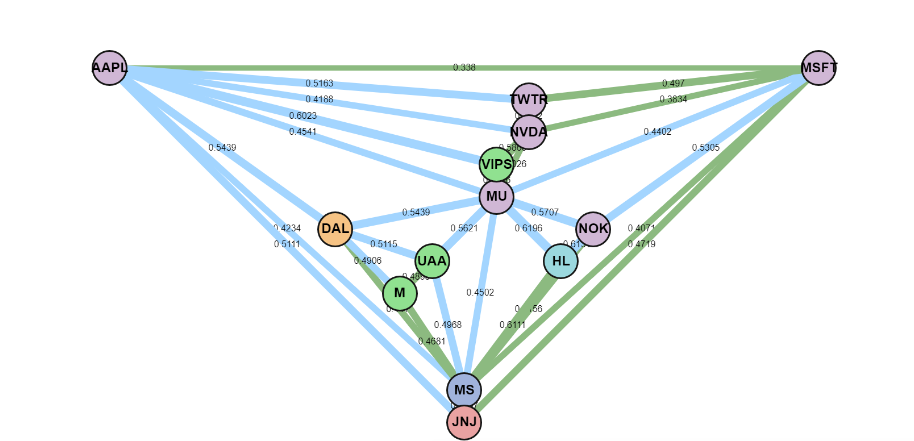

In [1]:
from IPython.display import Image
Image(filename='images/pmfg/pmfg_graph_only.png')

**MST within the PMFG**
 
PMFG contains ${3 (n - 2)}$ edges as opposed to the MST, which contains ${n - 1}$ edges where ${n}$ is the number of nodes in the network. The PMFG retains more information on the relationship between the nodes than the MST, but retains the MST as a subgraph. The edges of the MST are shown in green.

## Creating the PMFG Visualisation

This section shows how to create visualisations of the PMFG using the method `generate_pmfg_server`. 
First, we can import the necessary imports. 

In [2]:
# Import packages
import pandas as pd
import numpy as np

# Import MlFinLab tools
from mlfinlab.networks.visualisations import generate_pmfg_server

2023-06-20 11:06:59.461981: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Import example log returns data
url = "https://raw.githubusercontent.com/hudson-and-thames/example-data/main/logReturns.csv"
df = pd.read_csv(url, index_col=0)

# Create a smaller smaple 
df.drop(df.loc[:, 'T':'TSM'].columns, axis = 1, inplace=True) 
df.head()

,AAPL,MSFT,MS,TWTR,NOK,M,DAL,MU,UAA,VIPS,HL,NVDA,JNJ
Date,,,,,,,,,,,,,
2017-08-15,0.010888,-0.005040,-0.001721,-0.008739,0.000000,-0.002953,-0.003000,0.014936,-0.032931,-0.003575,-0.029169,-0.008468,-0.000749
2017-08-16,-0.004030,0.005856,-0.009087,0.013080,0.004728,-0.007420,0.004198,0.033463,-0.002198,-0.006286,0.025053,-0.011020,0.005905
2017-08-17,-0.019385,-0.017118,-0.020198,-0.018109,-0.017447,-0.026158,-0.053259,-0.035487,-0.020562,-0.084557,0.002060,-0.022535,-0.008458
2017-08-18,-0.002283,0.001242,0.006631,0.007533,-0.009646,-0.006648,0.000000,0.025335,-0.039513,-0.033902,0.002055,0.000186,-0.003086
2017-08-21,-0.001843,-0.004701,-0.015766,0.007477,-0.006483,0.002050,0.005874,-0.027362,-0.031447,-0.061703,0.020326,-0.014658,0.006164


**Adding Colours and Sizes**

As an optional feature, you can specify the PMFG node colours and sizes. The colours are specified by a dictionary of group name to a list of node names. The sizes are specified by a list of numbers corresponding to node indexes in the initial log returns dataframe.

In [4]:
# List Sector groups of the stocks
sector_groups = {
    "technology" : ['NVDA', 'TWTR', 'MSFT', 'NOK', 'AAPL', 'MU'],
    "financial services" : ['MS'],
    "consumer cyclical" : ['M', 'UAA', 'VIPS'],
    "basic materials" : ['HL'],
    "healthcare": ['JNJ'],
    "industrials" : ['DAL']
}
# Market Cap list corresponding to indexes of the dataframe
market_caps = [2120, 1612, 80.572, 31.053, 27.749, 1.942, 17.394, 47.395, 4.198, 11.837,
3.072, 313.029, 402.19] 

**Creating the Server**

The `generate_pmfg_server` takes in a log return dataframe. The `jupyter=True` allows the server to be run inside Jupyter Notebook, and the colours and sizes can be set as an optional argument. The `generate_pmfg_server` returns a Dash server, ready to be run. The `run_server` within Jupyter requires one of the following modes - 'inline', 'external' or 'jupyterlab'.

In [5]:
app = generate_pmfg_server(df, input_type='distance', jupyter=True, colours=sector_groups, sizes=market_caps)
app.run_server(mode='inline', port=8050)

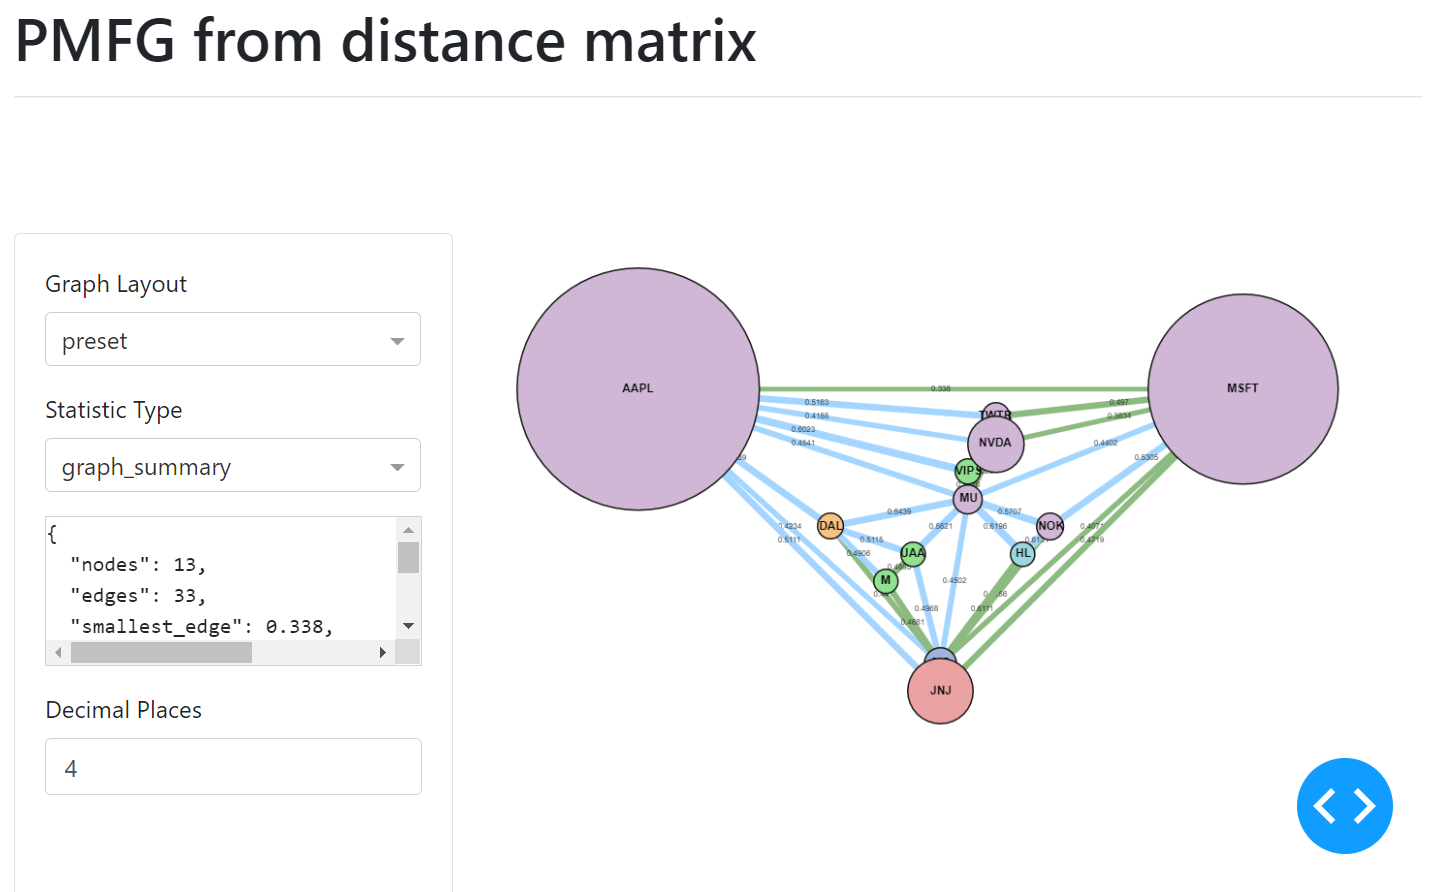

In [6]:
Image(filename='images/pmfg/sizes_colours_no_toast.png')

## Portfolio Selection using PMFG

[Pozzi, Di Matteo, and Aste (2013)](https://www.nature.com/articles/srep01665) conclude that it is "better to invest in the peripheries" of the PMFG, as it leads to better returns and reduced risk. By taking 92 stocks and indexes, the aim was to understand how the "peripheral" stocks would perform, compared to the "central" stocks during the drastic decline and recovery. The group included various sectors such as Energy, Consumer Defensive, Industrial, Healthcare, Finance, Technology amongst others, for stocks. ETFs and REITs were also included. This section closely follows the method presented by [Pozzi, Di Matteo, and Aste (2013)](https://www.nature.com/articles/srep01665) and this section is split into two parts:

 - Porfolio Selection pre-covid decline (from 20th Sepetember 2019 until the 15th of February 2020).
 - Performance Analysis comparison (from 16th of February until 20th of September 2020)
 
The selection is done to create $m$ most peripheral stocks and $m$ most central stocks. The nodes are ranked according to the centrality. The performance analysis compares the two groups of $m$ most central and $m$ most peripheral nodes.

Firstly, we do the additional imports.

In [7]:
# More packages
from datetime import datetime

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# And MlFinLab tools
from mlfinlab.networks.visualisations import generate_mst_server
from mlfinlab.networks.pmfg import PMFG 
from mlfinlab.networks.mst import MST
from mlfinlab.networks.dash_graph import DashGraph, PMFGDash

Then, we import the daily closing prices data for the past year on the 92 stocks. 

In [8]:
df = pd.read_csv('../Sample-Data/close_prices_stocks.csv', index_col=0, parse_dates=True)
df.drop(df.loc[:, 'MMM':'COP'].columns, axis = 1, inplace=True) 
df.head()

,CNX,ED,STZ,GLW,COST,CCI,CSX,CMI,CVS,DHI,...,HES,HPQ,HD,HON,HRL,HST,HUM,HBAN,ITW,IR
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-20,7.62,92.400002,205.100006,27.76,286.359985,140.580002,68.620003,161.570007,64.300003,51.580002,...,65.669998,18.469999,224.669998,168.309998,42.939999,17.240000,277.279999,14.40,155.059998,29.500000
2019-09-23,7.79,92.750000,205.770004,27.67,287.570007,141.440002,68.860001,162.190002,63.349998,52.200001,...,65.510002,18.520000,226.250000,167.139999,42.599998,17.219999,277.299988,14.45,154.300003,29.299999
2019-09-24,7.40,93.959999,205.039993,27.65,287.910004,142.350006,68.629997,160.610001,62.930000,51.930000,...,64.320000,18.150000,225.410004,165.759995,42.959999,17.100000,274.970001,14.21,152.220001,28.930000
2019-09-25,7.37,93.989998,204.000000,28.26,288.510010,140.089996,68.870003,161.369995,62.590000,52.520000,...,63.520000,18.410000,228.100006,166.929993,43.299999,17.059999,267.690002,14.37,154.610001,29.309999
2019-09-26,7.03,94.650002,206.070007,28.23,288.260010,142.000000,69.419998,159.949997,61.590000,52.410000,...,61.680000,18.420000,229.789993,167.029999,43.540001,16.900000,263.920013,14.25,155.320007,29.180000


We slice the dataframe to create a `pre_decline` dataframe consisting of data before the Covid-19 decline.

In [9]:
pre_decline = df.loc[np.datetime64('2019-09-20'):np.datetime64('2020-02-15')]

Then, we calculate the log returns dataframe.

In [10]:
log_ret_pre_decline = np.log(pre_decline).diff().iloc[1:]
log_ret_pre_decline.head()

,CNX,ED,STZ,GLW,COST,CCI,CSX,CMI,CVS,DHI,...,HES,HPQ,HD,HON,HRL,HST,HUM,HBAN,ITW,IR
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-23,0.022065,0.003781,0.003261,-0.003247,0.004217,0.006099,0.003491,0.003830,-0.014885,0.011948,...,-0.002439,0.002703,0.007008,-0.006976,-0.007950,-0.001161,0.000072,0.003466,-0.004913,-0.006803
2019-09-24,-0.051361,0.012961,-0.003554,-0.000723,0.001182,0.006413,-0.003346,-0.009789,-0.006652,-0.005186,...,-0.018332,-0.020181,-0.003720,-0.008291,0.008415,-0.006993,-0.008438,-0.016748,-0.013572,-0.012708
2019-09-25,-0.004062,0.000319,-0.005085,0.021822,0.002082,-0.016004,0.003491,0.004721,-0.005417,0.011297,...,-0.012516,0.014223,0.011863,0.007034,0.007883,-0.002342,-0.026832,0.011197,0.015579,0.013050
2019-09-26,-0.047231,0.006998,0.010096,-0.001062,-0.000867,0.013542,0.007954,-0.008839,-0.016106,-0.002097,...,-0.029395,0.000543,0.007382,0.000599,0.005527,-0.009423,-0.014184,-0.008386,0.004582,-0.004445
2019-09-27,0.016926,-0.000317,-0.000340,0.005299,-0.008046,-0.029516,-0.007374,0.008405,0.007924,-0.005165,...,-0.025451,0.005954,0.000305,0.006029,0.000000,0.012350,-0.024277,0.006993,-0.002450,-0.017284


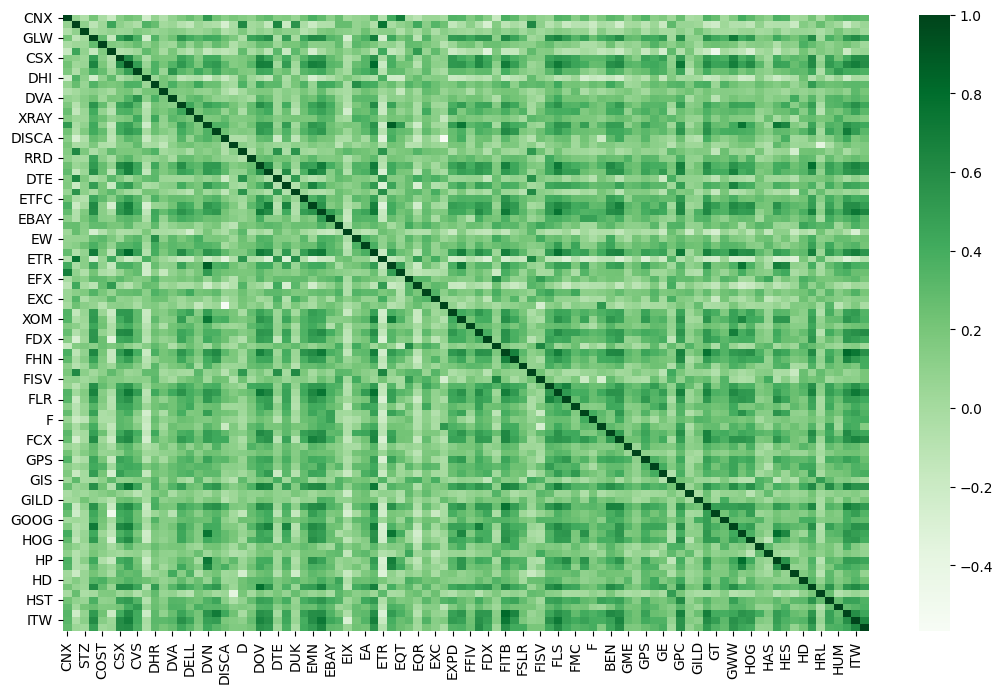

In [11]:
# Calculate correlation matrix
correlation_matrix = log_ret_pre_decline.corr(method='pearson')

# PLot Correlation matrix heatmap
plt.figure(figsize=(13,8))
sns.heatmap(correlation_matrix, cmap="Greens")
plt.show()

## Selection by Centrality ranking

A hybrid centrality measure proposed by [Pozzi, Di Matteo and Aste (2013)](https://www.nature.com/articles/srep01665) is given by $X + Y$. 

$$X = \frac{C_{D}^w + C_{D}^u + C_{BC}^w+ C_{BC}^u - 4}{4 * (N-1)}$$

$$Y = \frac{C_{E}^w + C_{E}^u + C_{C}^w + C_{C}^u + C_{EC}^w + C_{EC}^u- 6}{6 * (N-1)}$$

Where Degree (D), Betweenness Centrality (BC), the Eccentricity (E), the Closeness (C) and the Eigenvector Centrality (EC) for both weighted $C^w$ and unweighted graphs $C^u$. The nodes are ranked according to $X + Y$. 

However, [Pozzi, Di Matteo, and Aste (2013)](https://www.nature.com/articles/srep01665) state that this hybrid measure was used as it gave the best performances for the results of the paper, and that the peripheral nodes consistently perform better than central nodes "for all centrality measures". Thus, we use a variation of centrality measures from NetworkX's library to create the ranking of nodes. 

$$ranking = \sum{(C_{D}^w + C_{D}^u + C_{BC}^w+ C_{BC}^u + C_{E}^u + C_{C}^w + C_{C}^u - \frac{C_{SO}^w}{100} - C_{EC}^u)}$$

The factors included are: Degree (D), Betweenness Centrality (BC), Eccentricity (E), Closeness Centrality (C), Second Order Centrality (SO) and Eigenvector Centrality (EC). The Second Order Centrality (SO) is divided, as the output values would have a disproportionately large impact on the ranking.

In [12]:
from mlfinlab.networks.visualisations import generate_central_peripheral_ranking

In [13]:
# Create distance based PMFG
distance_matrix = np.sqrt(2 * (1 - correlation_matrix))
pmfg_dist = PMFG(distance_matrix, "distance")
pmfg_graph_distance = pmfg_dist.get_graph()

The method `generate_central_peripheral_ranking` generates a ranking based on how central or peripheral the nodes are. The smaller the ranking value, the more peripheral the node. The larger the ranking value, the more central the node. The resulting list shows the ranking of the nodes.

In [14]:
ranked_nodes = generate_central_peripheral_ranking(pmfg_graph_distance)

ranked_nodes = pd.DataFrame(ranked_nodes, columns=['Ranking', 'node'])
ranked_nodes

,Ranking,node
0,-7.746241,DHI
1,-7.373012,DD
2,-6.852654,GE
3,-6.666342,EXPD
4,-6.512487,EIX
...,...,...
87,24.020946,FLS
88,25.958717,FITB
89,26.365954,ETN
90,27.315073,CMI


### Stock Selection

From the ranking, we can slice the top 10 stocks, and the bottom 10 stocks from the list. 

In [15]:
m_stocks = 10

lowest_rank_peripheral = ranked_nodes.iloc[:m_stocks, 1].tolist()
highest_rank_central = ranked_nodes.iloc[-m_stocks:, 1].tolist()

print(lowest_rank_peripheral)
print(highest_rank_central)

['DHI', 'DD', 'GE', 'EXPD', 'EIX', 'EBAY', 'EXC', 'XRAY', 'EXPE', 'DISCA']
['FLIR', 'HP', 'DVN', 'FE', 'ECL', 'FLS', 'FITB', 'ETN', 'CMI', 'EMR']


In [16]:
# Define the colours to show the different ranked nodes.
colours = {
    'lowest_rank_peripheral' : lowest_rank_peripheral,
    'highest_rank_central' : highest_rank_central
}

In [17]:
# Generate PMFG visualisation server
server = generate_pmfg_server(log_ret_pre_decline, input_type="distance",
                              jupyter=True, colours=colours)
server.run_server(mode='inline', port=8051)

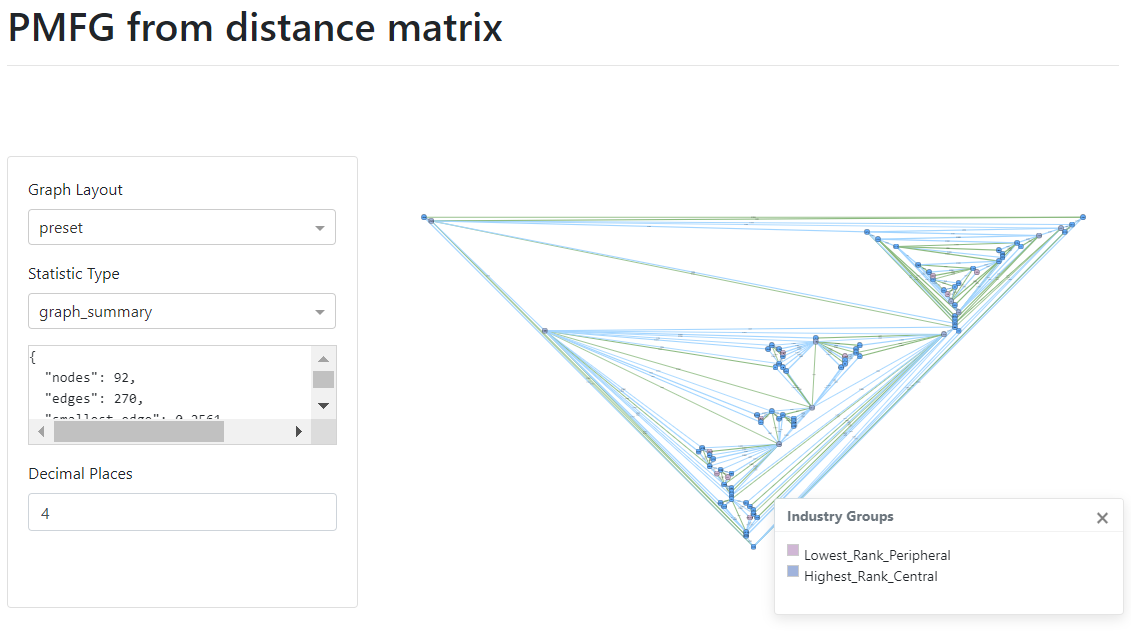

In [18]:
Image(filename='images/pmfg/pmfg_expected_output.png')

The PMFG shows the most central stocks with the highest rank values and the peripheral stocks with the lowest rank. The Minimum Spanning Tree is shown in the PMFG using the green edges. However, since it is difficult to see the MST, we can create a seperate graph to view this. 

In [19]:
server = generate_mst_server(log_ret_pre_decline, jupyter=True, colours=colours)
server.run_server(mode='inline', port=8052)

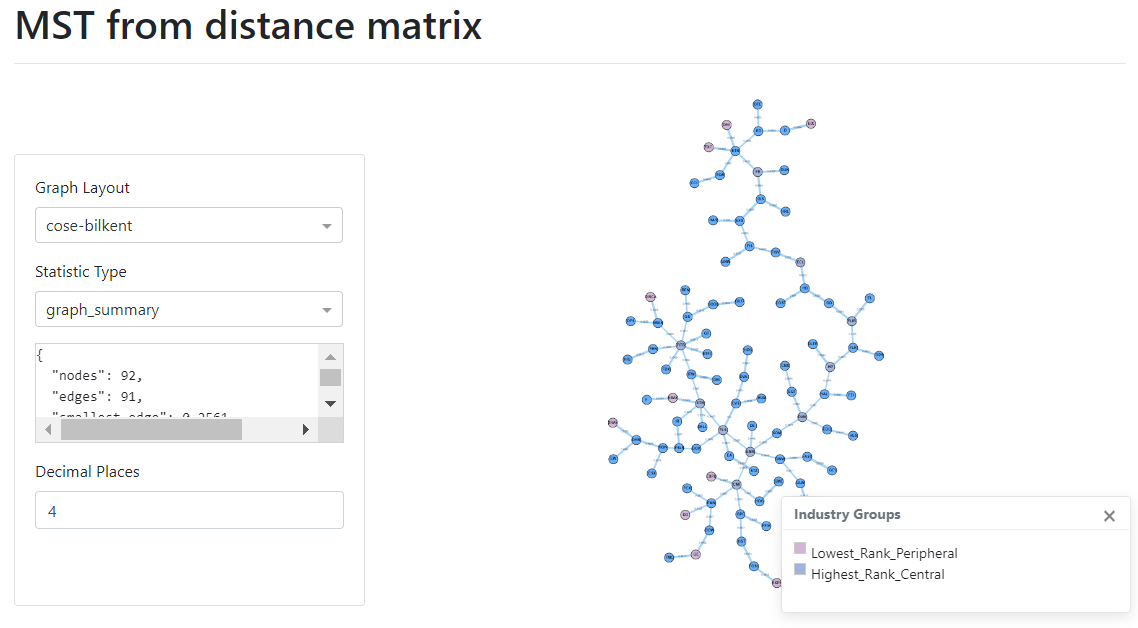

In [20]:
Image(filename='images/pmfg/mst_ranking.png')

## Analysing the Performances

The performances of the two portfolios are compared from the 16th of February 2020 until the 20th of September 2020. This simulates an investment made right before the dramatic drop in the market. By analysing this period, the aim is to understand whether picking peripheral stocks creates a more robust portfolio during an unexpected crisis like the Covid-19 pandemic.

In [21]:
df = pd.read_csv('../Sample-Data/close_prices_stocks.csv', index_col=0, parse_dates=True)
df.drop(df.loc[:, 'MMM':'COP'].columns, axis = 1, inplace=True)
df = df.loc[np.datetime64('2020-02-16'):np.datetime64('2020-09-20')]
df.head()

,CNX,ED,STZ,GLW,COST,CCI,CSX,CMI,CVS,DHI,...,HES,HPQ,HD,HON,HRL,HST,HUM,HBAN,ITW,IR
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-18,6.26,94.349998,203.820007,27.969999,322.049988,166.210007,79.510002,166.059998,72.000000,61.830002,...,61.139999,22.240000,243.940002,179.419998,48.259998,16.850000,372.119995,13.91,186.479996,37.549999
2020-02-19,6.41,93.879997,206.639999,27.959999,323.019989,165.600006,80.169998,167.839996,71.779999,61.880001,...,63.570000,22.430000,243.639999,180.860001,48.439999,16.709999,378.519989,14.03,187.529999,37.660000
2020-02-20,6.66,94.580002,208.339996,28.290001,324.079987,166.990005,80.449997,167.119995,71.940002,62.049999,...,64.720001,22.639999,247.020004,180.699997,45.529999,17.180000,370.989990,14.14,190.000000,38.650002
2020-02-21,6.66,90.180000,207.399994,27.959999,321.950012,168.059998,79.559998,167.460007,71.510002,61.880001,...,64.419998,22.700001,245.339996,179.880005,44.770000,17.379999,369.670013,13.91,189.580002,38.610001
2020-02-24,6.32,88.889999,201.539993,27.000000,313.619995,166.360001,78.059998,162.779999,67.919998,60.430000,...,60.220001,22.100000,239.699997,175.270004,44.570000,16.430000,346.160004,13.50,183.059998,36.560001


We will be using equal weights for elements in the portfolios for the "central" stocks and the "peripheral" stocks.

In [22]:
lowest_df = df.loc[:, lowest_rank_peripheral]

weights = np.ones(10) / 10
lowest_df_returns = lowest_df.pct_change()[1:] * weights
lowest_portfolio_ret = lowest_df_returns.sum(axis=1)
lowest_portfolio_price = (lowest_portfolio_ret + 1).cumprod()

lowest_df.head()

,DHI,DD,GE,EXPD,EIX,EBAY,EXC,XRAY,EXPE,DISCA
Date,,,,,,,,,,
2020-02-18,61.830002,53.439999,12.75,74.430000,77.120003,37.869999,50.380001,57.919998,121.099998,30.299999
2020-02-19,61.880001,53.500000,12.61,76.180000,76.639999,37.529999,49.599998,58.590000,121.879997,30.480000
2020-02-20,62.049999,52.549999,12.53,75.470001,77.320000,37.689999,49.849998,57.439999,121.660004,29.980000
2020-02-21,61.880001,52.430000,12.25,75.410004,77.570000,38.200001,49.720001,56.849998,120.120003,29.209999
2020-02-24,60.430000,50.450001,11.86,72.970001,76.320000,37.259998,48.820000,54.720001,112.309998,28.309999


In [23]:
highest_df = df.loc[:, highest_rank_central]

weights = np.ones(10) / 10
highest_df_returns = highest_df.pct_change()[1:] * weights
highest_portfolio_ret = highest_df_returns.sum(axis=1)
highest_portfolio_price = (highest_portfolio_ret + 1).cumprod()

highest_df.head()

,FLIR,HP,DVN,FE,ECL,FLS,FITB,ETN,CMI,EMR
Date,,,,,,,,,,
2020-02-18,56.580002,45.070000,22.160000,52.270000,207.679993,45.980000,29.240000,104.470001,166.059998,71.440002
2020-02-19,57.799999,45.459999,22.719999,52.150002,210.309998,45.540001,29.639999,104.309998,167.839996,71.860001
2020-02-20,58.189999,45.470001,22.150000,51.790001,206.309998,46.349998,29.830000,105.099998,167.119995,72.019997
2020-02-21,58.349998,44.900002,20.969999,51.570000,207.500000,45.990002,29.400000,104.930000,167.460007,72.089996
2020-02-24,56.790001,41.900002,19.180000,50.630001,202.520004,43.570000,28.309999,101.650002,162.779999,69.190002


### Cumulative Returns

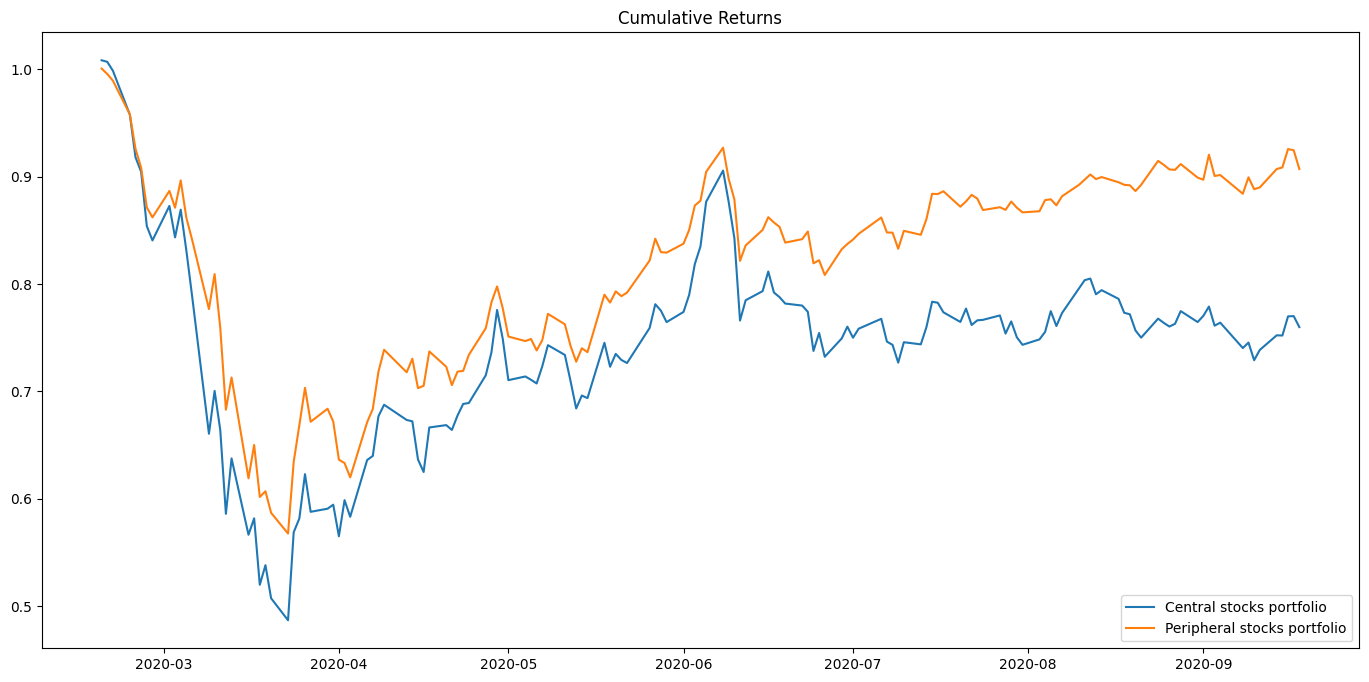

In [24]:
fig = plt.figure(figsize=(17,8))

plt.plot(highest_portfolio_price, label='Central stocks portfolio')
plt.plot(lowest_portfolio_price, label='Peripheral stocks portfolio')
plt.legend(loc="lower right")
plt.title('Cumulative Returns')
plt.show()

The cumulative returns plot shows that the peripheral portfolio stocks outperformed the central stocks portfolio. The peripheral portfolio recovers to 90.7% of its original value, whereas the central portfolio recovers to 76% of its original value (to 3 significant figures). The trough of both of the cumulative returns shows that the central stocks portfolio dropped 8% further than the peripheral portfolio. 

We can compare the maximum drawdown, Sharpe Ratio, and the volatility for a further performance comparison. 

### Max Drawdown

In [25]:
from mlfinlab.backtest_statistics.statistics import drawdown_and_time_under_water

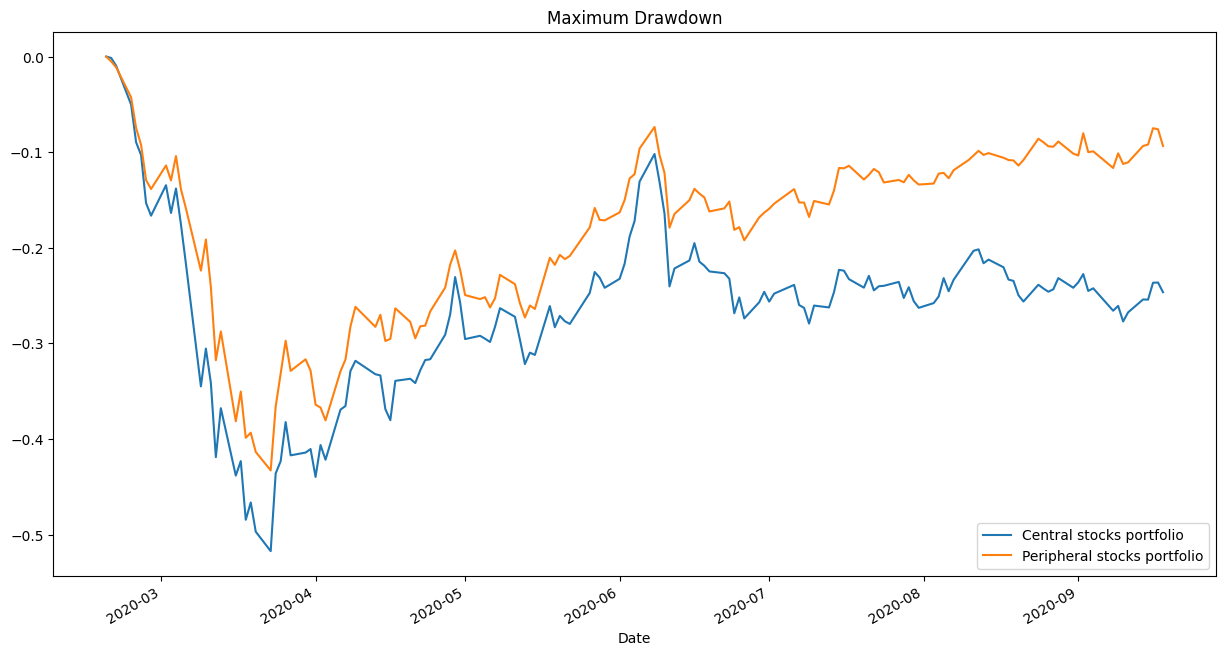

In [26]:
fig = plt.figure(figsize=(15,8))

previous_peaks = highest_portfolio_price.cummax()
drawdown = (highest_portfolio_price - previous_peaks)/previous_peaks
drawdown.plot(label='Central stocks portfolio')

previous_peaks = lowest_portfolio_price.cummax()
drawdown = (lowest_portfolio_price - previous_peaks)/previous_peaks
drawdown.plot(label='Peripheral stocks portfolio')

plt.title('Maximum Drawdown')
plt.legend(loc="lower right")
plt.plot();

In [27]:
lowest_drawdown, _ = drawdown_and_time_under_water(lowest_portfolio_price)
highest_drawdown, _ = drawdown_and_time_under_water(highest_portfolio_price)
print('Max Drawdown for Periperal stocks portfolio is ', lowest_drawdown[0])
print('Max Drawdown for Central stocks portfolio is ', highest_drawdown[0])
print('Max Drawdown difference is ', highest_drawdown[0] -lowest_drawdown[0])

Max Drawdown for Periperal stocks portfolio is  0.43289167227519054
Max Drawdown for Central stocks portfolio is  0.5173672015723718
Max Drawdown difference is  0.08447552929718127


### Sharpe Ratio 

The Sharpe Ratio, with a risk free rate of 0, is used to compare the central and peripheral stocks. It is the average return divided by its standard deviation for $1, .., n$ days following the investment. 

In [28]:
def rolling_sharpe_ratio(returns_series, rolling_period=63):
    mean = returns_series.rolling(min_periods=rolling_period, window=rolling_period).mean()
    std = returns_series.rolling(min_periods=rolling_period, window=rolling_period).std()
    rolling_sharpe = (mean / std * np.sqrt(252))[rolling_period:]

    return rolling_sharpe

In [29]:
df = pd.read_csv('../Sample-Data/close_prices_stocks.csv', index_col=0, parse_dates=True)
df.drop(df.loc[:, 'MMM':'COP'].columns, axis = 1, inplace=True)
df = df.loc[np.datetime64('2019-11-16'):np.datetime64('2020-09-20')]
weights = np.ones(10) / 10

lowest_df = df.loc[:, lowest_rank_peripheral]
lowest_df_returns = lowest_df.pct_change()[1:] * weights
lowest_portfolio_ret = lowest_df_returns.sum(axis=1)

highest_df = df.loc[:, highest_rank_central]
highest_df_returns = highest_df.pct_change()[1:] * weights
highest_portfolio_ret = highest_df_returns.sum(axis=1)

In [30]:
central_stocks_sharpe = rolling_sharpe_ratio(highest_portfolio_ret)
peripheral_stocks_sharpe = rolling_sharpe_ratio(lowest_portfolio_ret)
print(peripheral_stocks_sharpe.head())
print(central_stocks_sharpe.tail())

Date
2020-02-21    1.941376
2020-02-24    0.538256
2020-02-25   -0.490940
2020-02-26   -1.188199
2020-02-27   -2.133959
dtype: float64
Date
2020-09-14   -0.631663
2020-09-15   -0.983635
2020-09-16   -0.282359
2020-09-17   -0.197100
2020-09-18   -0.280268
dtype: float64


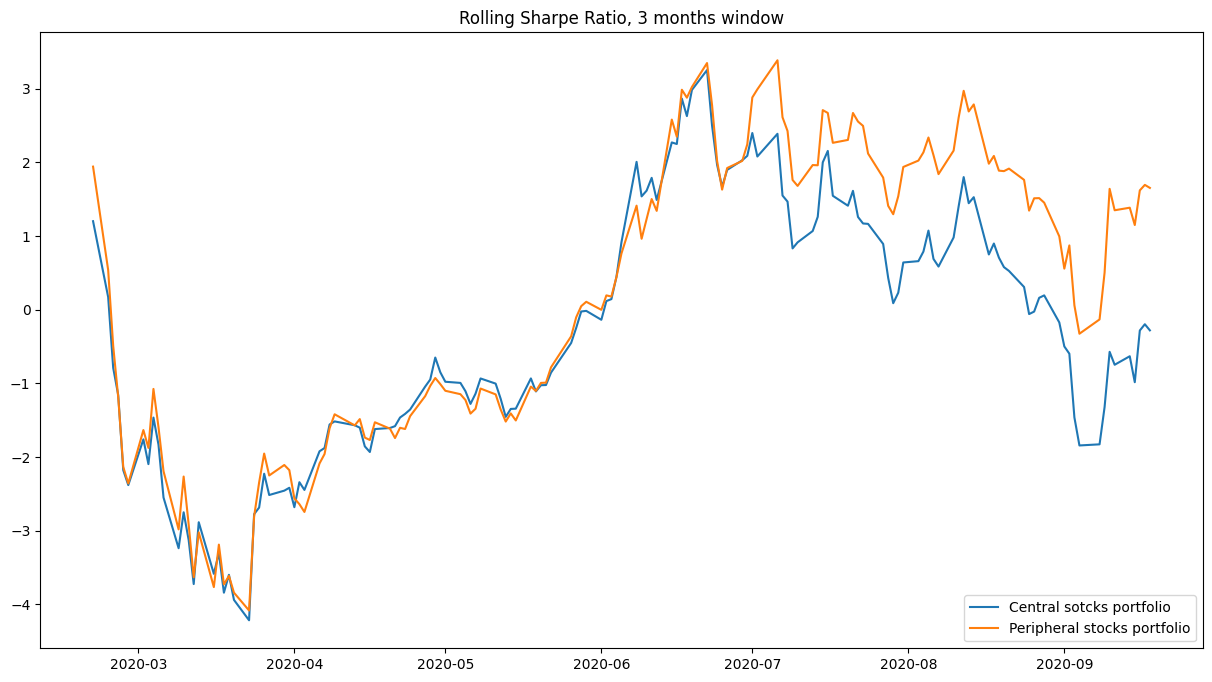

In [31]:
fig = plt.figure(figsize=(15,8))

plt.plot(central_stocks_sharpe, label='Central sotcks portfolio')
plt.plot(peripheral_stocks_sharpe, label='Peripheral stocks portfolio')
plt.legend(loc="lower right")
plt.title('Rolling Sharpe Ratio, 3 months window')
plt.show()

The plot shows that the central stocks portfolio and peripheral stocks portfolio have very similar Sharpe ratios until around late June. From mid June until the 20th of September, we see the Sharpe ratios diverging significantly, where the peripheral stock portfolios have a higher Sharpe Ratio. 

### Volatility

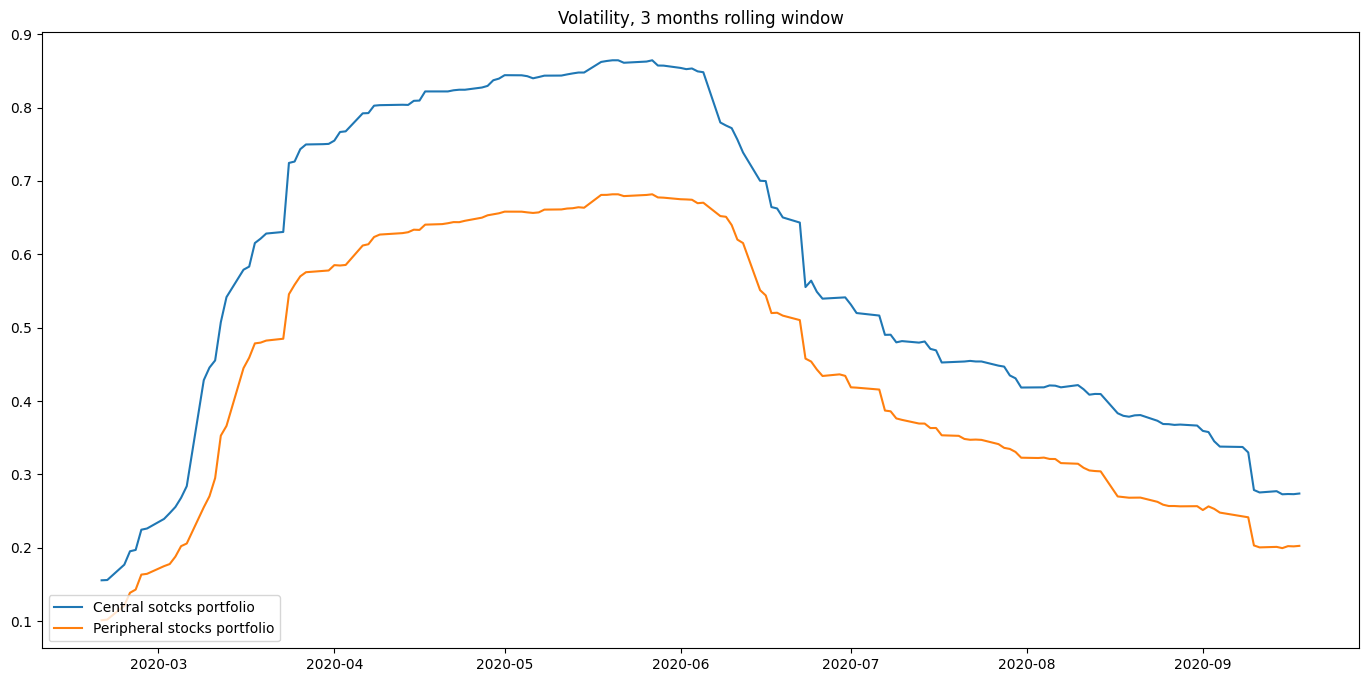

In [32]:
fig = plt.figure(figsize=(17,8))

highest_vol = highest_portfolio_ret.rolling(window=63).std() * np.sqrt(252)
lowest_vol = lowest_portfolio_ret.rolling(window=63).std() * np.sqrt(252)

plt.plot(highest_vol, label='Central sotcks portfolio')
plt.plot(lowest_vol, label='Peripheral stocks portfolio')
plt.legend(loc="lower left")
plt.title('Volatility, 3 months rolling window')
plt.show()

The rolling volatility of the peripheral portfolio is consistently lower throughout the period. Since the values are calculated on a 3 months rolling window, the greatest volatility gap between the portfolios is shown during April 2020 until June 2020, to reflect on the high volatility time period of February 2020 until May 2020. 

## Comapring MST and ALMST

You can create MST vs. ALMST visualisation comparisons using the `generate_mst_almst_comparison`. This creates a dual interface in dash of the MST and ALMST, highlighting the differing edges. You can also click on a specific node to highlight the node in the other graph.

In [33]:
from mlfinlab.networks.visualisations import generate_mst_almst_comparison

In [34]:
df = pd.read_csv('../Sample-Data/logReturns.csv', index_col=False)

# Create a smaller smaple 
df.drop(df.loc[:, 'M':'OSTK'].columns, axis = 1, inplace=True) 
df

,Date,AAPL,MSFT,MS,TWTR,NOK,FB,MRO,C,ZNGA,...,INO,AUY,XOM,TSM,MU,UAA,VIPS,HL,NVDA,JNJ
0,2017-08-15,0.010888,-0.005040,-0.001721,-0.008739,0.000000,0.001463,-0.008636,0.001178,0.011111,...,0.000000,-0.003868,-0.002432,0.010211,0.014936,-0.032931,-0.003575,-0.029169,-0.008468,-0.000749
1,2017-08-16,-0.004030,0.005856,-0.009087,0.013080,0.004728,-0.005865,-0.029932,-0.003833,0.000000,...,-0.021506,0.056512,-0.007331,-0.002199,0.033463,-0.002198,-0.006286,0.025053,-0.011020,0.005905
2,2017-08-17,-0.019385,-0.017118,-0.020198,-0.018109,-0.017447,-0.018344,-0.033624,-0.016529,-0.013908,...,-0.029414,0.003656,-0.015742,-0.015251,-0.035487,-0.020562,-0.084557,0.002060,-0.022535,-0.008458
3,2017-08-18,-0.002283,0.001242,0.006631,0.007533,-0.009646,0.002991,0.004610,-0.000300,0.013908,...,0.016652,-0.018417,0.004971,0.001954,0.025335,-0.039513,-0.033902,0.002055,0.000186,-0.003086
4,2017-08-21,-0.001843,-0.004701,-0.015766,0.007477,-0.006483,0.002208,-0.009242,-0.009507,-0.005540,...,0.001833,0.025689,-0.003398,0.003341,-0.027362,-0.031447,-0.061703,0.020326,-0.014658,0.006164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2020-08-04,0.006656,-0.015123,-0.004052,-0.001100,0.007874,-0.008490,0.046026,-0.004974,0.004919,...,-0.018045,0.041008,0.028467,0.015584,0.017898,0.026532,-0.016733,0.079079,0.019562,-0.000883
748,2020-08-05,0.003618,-0.001642,0.010300,0.012032,-0.019803,-0.002846,0.034017,0.017791,-0.011846,...,0.069846,0.016237,0.008704,0.017798,-0.004885,0.066236,0.043447,0.059360,0.005241,0.007983
749,2020-08-06,0.034294,0.015887,-0.006450,0.024169,0.000000,0.062851,-0.051469,-0.002943,-0.011988,...,-0.069354,-0.016237,-0.004801,-0.013691,-0.047126,-0.045309,0.015609,0.035199,0.004310,-0.005744
750,2020-08-07,-0.024800,-0.018050,0.018037,-0.014700,-0.004008,0.011842,0.010508,0.023882,-0.022359,...,-0.005425,-0.036368,-0.004594,-0.006104,0.001026,0.018564,-0.033194,-0.083055,-0.012070,0.007091


In [35]:
server = generate_mst_almst_comparison(df, jupyter=True)
server.run_server(mode='inline', port=8053)

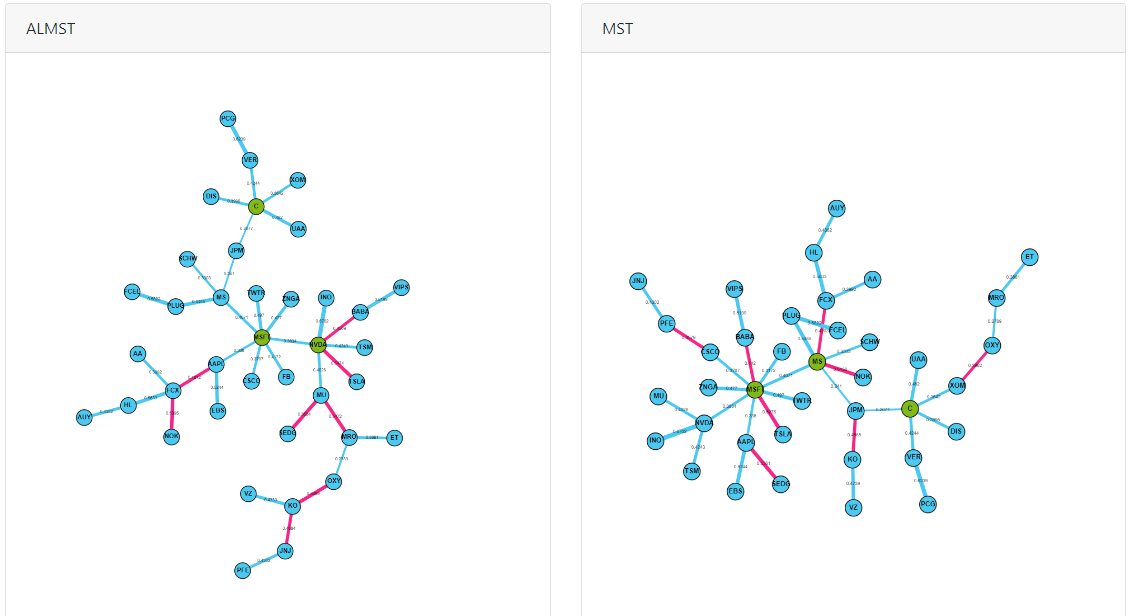

In [36]:
Image(filename='images/pmfg/almst_mst.png')

## Conclusion

The notebook showcased how to construct the PMFG visualisations, and the comparison interface of the MST and ALMST. The notebook also explored how the peripheral stocks portfolio performed compared to the central stocks portfolio following the dramatic drop in late February due to the Covid-19 pandemic. 

Neither the peripheral portfolio nor the central stocks portfolio recovered to their initial values before the drop in the market. However, the peripheral stocks portfolio significantly outperformed the central stocks portfolio. While the central stocks portfolio value remained mostly flat (from late June until late September), the peripheral stocks portfolio continued to recover. This was reflected in the Rolling Sharpe Ratio, where the portfolio ratios diverged noticeably towards the end of the period. The peripheral portfolio recovered to 90.7% of its original value, whereas the central portfolio recovered to 76% of its original value by the 20th of September 2020. 

It is evident that the peripheral portfolio is exposed to less systemic risk. The peripheral portfolio dropped 8% less than the central stocks portfolio. The volatility is consistently lower for the peripheral stocks. This suggests that the portfolio consisting of peripheral stocks are more shock resistant than the portfolio consisting of central stocks. The analysis of the performances suggests that the peripheral stocks portfolio is less risky, recovers more swifty, and is more Covid-19 robust.

### References

1. Tumminello, M., Aste, T., Di Matteo, T. and Mantegna, R.N., 2005. A tool for filtering information in complex systems. Proceedings of the National Academy of Sciences, 102(30), pp.10421-10426.  https://arxiv.org/pdf/cond-mat/0501335.pdf
8. Pozzi, F., Di Matteo, T. and Aste, T., 2013. Spread of risk across financial markets: better to invest in the peripheries. Scientific reports, 3, p.1665. https://www.nature.com/articles/srep01665 